# Veri Ön İşleme

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv("verikümesi.csv", sep = ';')

# V1 sütunu object tipinde olduğu için sayısal bir formata dönüştürüyoruz.
cleaned_dataset = dataset.copy()
cleaned_dataset['V1'] = pd.to_numeric(cleaned_dataset['V1'], errors='coerce')

mean_value = cleaned_dataset['V1'].mean()

# Sayısal olmayan değerleri ortalamayla değiştiriyoruz.
cleaned_dataset.loc[~cleaned_dataset['V1'].notnull(), 'V1'] = mean_value


y = cleaned_dataset['Class']
X = cleaned_dataset.drop(['Class', 'Unnamed: 31', 'Unnamed: 32'], axis = 1)

# Veriyi normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi farklı oranlarda böl
splits = {
    '30_train_70_test': train_test_split(X_scaled, y, test_size=0.70, random_state=42),
    '40_train_60_test': train_test_split(X_scaled, y, test_size=0.60, random_state=42),
    '80_train_20_test': train_test_split(X_scaled, y, test_size=0.20, random_state=42)
}

# RNN Algoritması

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
# RNN Modelini tanımla

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=input_shape, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğit ve değerlendir
results = {}
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    print(f'Training with split: {split_name}')
    
    # Veriyi RNN için 3D formata dönüştür
    X_train_rnn = np.expand_dims(X_train, axis=1)
    X_test_rnn = np.expand_dims(X_test, axis=1)
    
    # Modeli oluştur
    model = create_rnn_model((X_train_rnn.shape[1], X_train_rnn.shape[2]))
    
    # Modeli eğit
    model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1)
    
    # Tahmin yap
    y_pred_prob = model.predict(X_test_rnn)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    results[split_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'precision': precision
    }

# Sonuçları yazdır
print(results)

Training with split: 30_train_70_test
Epoch 1/10


/Users/muhammeteminaydinalp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7543 - loss: 0.5494 - val_accuracy: 0.9589 - val_loss: 0.2645
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9673 - loss: 0.2291 - val_accuracy: 0.9763 - val_loss: 0.1437
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.9799 - loss: 0.1293 - val_accuracy: 0.9829 - val_loss: 0.0990
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.9860 - loss: 0.0816 - val_accuracy: 0.9849 - val_loss: 0.0802
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.9775 - loss: 0.0852 - val_accuracy: 0.9857 - val_loss: 0.0723
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.9863 - loss: 0.0634 - val_accuracy: 0.9849 - val_loss: 0.0682
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9910 - loss: 0.0494 - val_accuracy: 0.9844 - val_loss: 0.0659
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.9838 - loss: 0.0623 - val_accuracy: 0.9844 - val_lo

/Users/muhammeteminaydinalp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.5582 - val_accuracy: 0.9729 - val_loss: 0.2372
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9714 - loss: 0.1990 - val_accuracy: 0.9851 - val_loss: 0.1162
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9800 - loss: 0.1072 - val_accuracy: 0.9866 - val_loss: 0.0820
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9841 - loss: 0.0815 - val_accuracy: 0.9848 - val_loss: 0.0719
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9855 - loss: 0.0657 - val_accuracy: 0.9845 - val_loss: 0.0675
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9857 - loss: 0.0600 - val_accuracy: 0.9839 - val_loss: 0.0659
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9866 - loss: 0.0532 - val_accuracy: 0.9842 - val_loss: 0.0648
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9835 - loss: 0.0630 - val_accuracy: 0.9839 - val_lo

/Users/muhammeteminaydinalp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7948 - loss: 0.4644 - val_accuracy: 0.9893 - val_loss: 0.1031
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9835 - loss: 0.1053 - val_accuracy: 0.9902 - val_loss: 0.0619
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9864 - loss: 0.0707 - val_accuracy: 0.9902 - val_loss: 0.0548
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.9877 - loss: 0.0555 - val_accuracy: 0.9902 - val_loss: 0.0522
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.9869 - loss: 0.0613 - val_accuracy: 0.9893 - val_loss: 0.0514
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.9837 - loss: 0.0666 - val_accuracy: 0.9902 - val_loss: 0.0504
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.9850 - loss: 0.0660 - val_accuracy: 0.9902 - val_loss: 0.0495
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9859 - loss: 0.0590 - val_accurac

# Farklı Eğitim-Test Oranlarında RNN Performansı

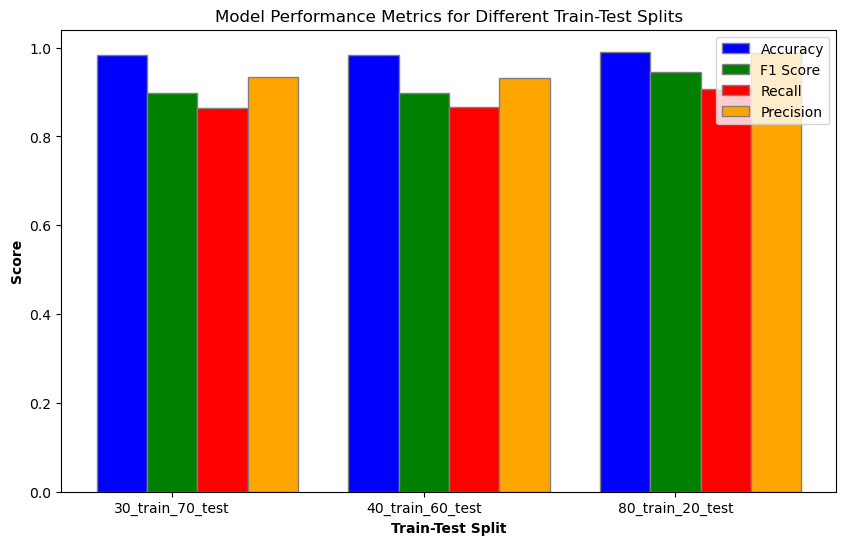

In [5]:
# Sonuçlar
results = {
    '30_train_70_test': {'accuracy': 0.9836734693877551, 'f1_score': 0.8974358974358975, 'recall': 0.8641975308641975, 'precision': 0.9333333333333333},
    '40_train_60_test': {'accuracy': 0.9833333333333333, 'f1_score': 0.8978102189781022, 'recall': 0.8661971830985915, 'precision': 0.9318181818181818},
    '80_train_20_test': {'accuracy': 0.9910714285714286, 'f1_score': 0.9456521739130435, 'recall': 0.90625, 'precision': 0.9886363636363636}
}

# Oranlar
splits = list(results.keys())
metrics = ['accuracy', 'f1_score', 'recall', 'precision']

# Her bir metrik için değerleri ayır
accuracy_values = [results[split]['accuracy'] for split in splits]
f1_values = [results[split]['f1_score'] for split in splits]
recall_values = [results[split]['recall'] for split in splits]
precision_values = [results[split]['precision'] for split in splits]

# Bar genişliği
bar_width = 0.2

# X pozisyonları
r1 = np.arange(len(splits))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Grafik oluştur
plt.figure(figsize=(10, 6))

# Bar grafikleri
plt.bar(r1, accuracy_values, color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, f1_values, color='green', width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r3, recall_values, color='red', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, precision_values, color='orange', width=bar_width, edgecolor='grey', label='Precision')

# X ekseni etiketleri
plt.xlabel('Train-Test Split', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(splits))], splits)

# Y ekseni etiketi
plt.ylabel('Score', fontweight='bold')

# Başlık
plt.title('Model Performance Metrics for Different Train-Test Splits')

# Legend
plt.legend()

# Grafiği göster
#plt.savefig('rnn.jpeg', format='jpeg')

plt.show()